# Video Game Sales EDA

This notebook performs exploratory data analysis (EDA) on a video game sales dataset. We will load the data, explore its structure, clean it, and visualize key trends.

In [1]:
# Load Data
import pandas as pd

# Update the filename below to match your dataset's actual filename
file_path = 'vgsales.csv'
df = pd.read_csv(file_path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# Explore Data Structure
print('Columns:', df.columns.tolist())
print('\nData Types:')
print(df.dtypes)
print('\nSample Rows:')
print(df.sample(5))

Columns: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Data Types:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Sample Rows:
        Rank                                      Name Platform    Year  \
8537    8539                 Midway Arcade Treasures 3      PS2  2005.0   
10681  10683                           Kung Fu Panda 2      PS3  2011.0   
14237  14240  Summer Athletics: The Ultimate Challenge     X360  2008.0   
6915    6917                   Tiger Woods PGA Tour 10      PSP  2009.0   
11388  11390               The Sims 2: Ikea Home Stuff       PC  2008.0   

            Genre          Publisher  NA_Sales  EU_Sales  JP_Sales  \
8537         Misc       Midway Games   

In [3]:
# Basic Data Cleaning
print('Missing values per column:')
print(df.isnull().sum())

# Example: Drop rows with missing values (customize as needed)
df_clean = df.dropna()
print(f'Rows after dropping missing values: {len(df_clean)}')

Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Rows after dropping missing values: 16291


Top 10 Best-Selling Games:
                        Name Platform    Year         Genre  Global_Sales
0                 Wii Sports      Wii  2006.0        Sports         82.74
1          Super Mario Bros.      NES  1985.0      Platform         40.24
2             Mario Kart Wii      Wii  2008.0        Racing         35.82
3          Wii Sports Resort      Wii  2009.0        Sports         33.00
4   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing         31.37
5                     Tetris       GB  1989.0        Puzzle         30.26
6      New Super Mario Bros.       DS  2006.0      Platform         30.01
7                   Wii Play      Wii  2006.0          Misc         29.02
8  New Super Mario Bros. Wii      Wii  2009.0      Platform         28.62
9                  Duck Hunt      NES  1984.0       Shooter         28.31


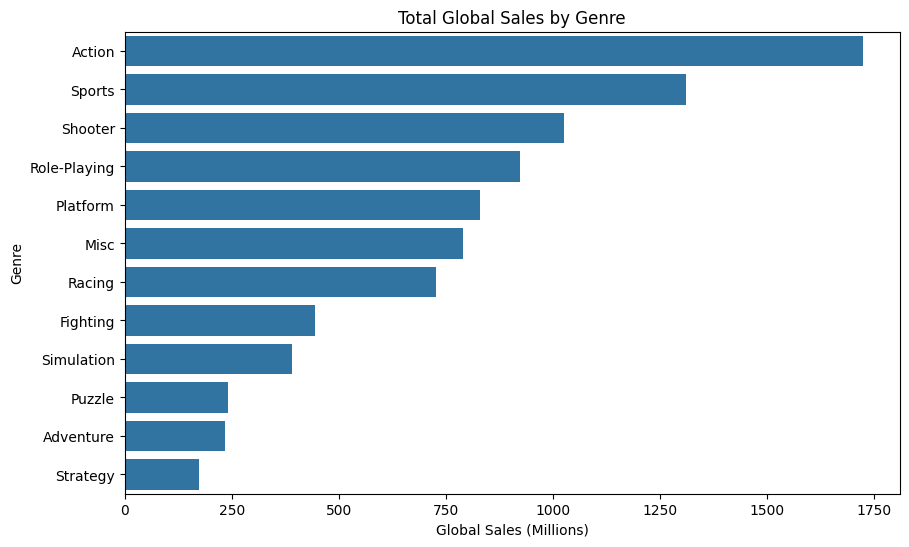

In [9]:
# Further EDA: Top-Selling Games and Sales by Genre
# Top 10 best-selling games
print('Top 10 Best-Selling Games:')
top_games = df_clean.sort_values('Global_Sales', ascending=False).head(10)
print(top_games[['Name', 'Platform', 'Year', 'Genre', 'Global_Sales']])

# Sales by genre
import matplotlib.pyplot as plt
import seaborn as sns
genre_sales = df_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Total Global Sales by Genre')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Genre')
plt.show()